<a href="https://colab.research.google.com/github/donggun112/ABCD-A/blob/20250529/yolov8_train_segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 초기 환경 설정

In [2]:
# YOLOv8 설치
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
# 필요한 라이브러리 임포트
import os
from ultralytics import YOLO
import shutil
from google.colab import drive
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# 파일 선택기를 통한 업로드
uploaded = files.upload()

Saving Test.v1i.yolov8.zip to Test.v1i.yolov8.zip


In [7]:
# 코랩 셀에서 ! 를 앞에 붙여서 실행
!mkdir -p /content/dataset
!unzip /content/Test.v1i.yolov8.zip -d /content/dataset

Archive:  /content/Test.v1i.yolov8.zip
replace /content/dataset/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

다음 폴더 구조를 수정합니다.


content/

├── dataset
│   ├──train
│   │   ├──images
│   │   ├──labels
│   ├──valid
│   │   ├──images
│   ├──test
│   │   ├──images
└── data.yaml





In [8]:
#test/images 폴더 생성
!mkdir -p /content/dataset/test/images
!cp /content/dataset/train/images/* /content/dataset/test/images/

In [9]:
#valid/images 폴더 생성
!mkdir -p /content/dataset/valid/images
!cp /content/dataset/train/images/* /content/dataset/valid/images/

In [10]:
#valid/labels 폴더 생성
!mkdir -p /content/dataset/valid/labels
!cp /content/dataset/train/labels/* /content/dataset/valid/labels/

#data.yaml 파일 수정

train: /content/dataset/train/images
val: /content/dataset/valid/images
test: /content/dataset/test/images

In [11]:
# 학습 시작
from ultralytics import YOLO

# Segmentation 모델로 학습
model = YOLO('yolov8l-seg.pt')  # segmentation 모델 사용

results = model.train(
    data='/content/dataset/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='yolov8_seg_custom',
    project='/content/runs/train',
    patience=10,
    save=True,
    device=0
)

100%|██████████| 88.1M/88.1M [00:00<00:00, 302MB/s]


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_seg_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, 

100%|██████████| 755k/755k [00:00<00:00, 126MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              


  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  8                  -1  3   4461568  ultralytics.nn.modules.block.C2f             [512, 512, 3, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   4723712  ultralytics.nn.modules.block.C2f             [1024, 512, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 296MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 612.5±284.4 MB/s, size: 21.4 KB)


train: Scanning /content/dataset/train/labels... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 1494.44it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 610.1±311.5 MB/s, size: 21.5 KB)


val: Scanning /content/dataset/valid/labels... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 1188.86it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to /content/runs/train/yolov8_seg_custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs/train/yolov8_seg_custom
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.1G      1.813      4.973        3.7      1.743        231        640: 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         15        120      0.325     0.0233      0.104     0.0423        0.8     0.0176     0.0263     0.0205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.1G      1.714      5.728      3.674      1.673        205        640: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         15        120      0.348     0.0233     0.0999     0.0396        0.8     0.0178     0.0263     0.0204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.1G      1.763      4.645      3.541      1.787        184        640: 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         15        120      0.552     0.0233      0.101     0.0403        0.8     0.0179     0.0274     0.0213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.1G      1.886      5.369      3.718      1.766        238        640: 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         15        120        0.8     0.0183     0.0838     0.0359        0.8      0.018     0.0276     0.0216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.2G      1.766      4.651      3.642      1.778        258        640: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         15        120        0.8     0.0187     0.0783     0.0348        0.8     0.0184     0.0288      0.022



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.1G      1.711      5.336       3.66      1.751        204        640: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         15        120        0.8     0.0186      0.079     0.0373        0.8     0.0182      0.034     0.0235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.2G      1.705      4.935      3.553      1.628        237        640: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         15        120      0.563     0.0296     0.0807     0.0393        0.8     0.0234     0.0351     0.0241



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.1G      1.831      5.531      3.723      1.797        207        640: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         15        120      0.366     0.0325     0.0789     0.0381        0.8     0.0205      0.036     0.0249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.2G      1.828      5.125      3.609      1.811        241        640: 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         15        120      0.846      0.477      0.561      0.305      0.726      0.249      0.376      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.5G      1.191      2.944      2.227      1.414        228        640: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         15        120      0.747      0.654      0.695      0.366      0.701      0.593      0.644      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.5G      1.002      2.306      1.865      1.236        224        640: 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         15        120      0.671      0.801      0.848       0.44      0.591       0.67      0.632      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.4G     0.9575      2.181      1.634      1.242        154        640: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         15        120      0.622      0.716      0.794      0.465      0.606      0.656      0.773      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.4G     0.7887      1.747      1.323      1.192        166        640: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         15        120      0.844      0.759      0.943      0.685      0.827      0.745      0.922      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.4G     0.8439        1.8      1.219      1.198        140        640: 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         15        120      0.764      0.848      0.926      0.683      0.836       0.68      0.742      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.5G     0.7654      1.741      1.258      1.088        173        640: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         15        120       0.69      0.853       0.92      0.679      0.605      0.624      0.671      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.5G      0.721      1.179     0.8582      1.018        250        640: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         15        120      0.685      0.852      0.874      0.609      0.692      0.812      0.856      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.5G     0.6892      1.097      0.918      1.054        214        640: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         15        120      0.825      0.862      0.944      0.768      0.806      0.849      0.921      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.4G     0.7388     0.9908     0.9633      1.052        184        640: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         15        120      0.825      0.862      0.944      0.768      0.806      0.849      0.921      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.6G     0.6893     0.8603     0.7829     0.9875        201        640: 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         15        120      0.859      0.925      0.905      0.777      0.846      0.912      0.887      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.4G     0.5595     0.9613     0.7707     0.9633        177        640: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         15        120      0.859      0.925      0.905      0.777      0.846      0.912      0.887      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.7G     0.6014      0.902     0.8051     0.9618        206        640: 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         15        120      0.865      0.931      0.972      0.865      0.848      0.917      0.947      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.5G      0.621     0.9216     0.7378     0.9899        193        640: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         15        120      0.865      0.931      0.972      0.865      0.848      0.917      0.947      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.7G     0.6419      0.835     0.7853     0.9351        223        640: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         15        120      0.751      0.931      0.941      0.841      0.733      0.915      0.919      0.692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.4G     0.6116     0.7748     0.6749     0.9899        189        640: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         15        120      0.751      0.931      0.941      0.841      0.733      0.915      0.919      0.692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.7G     0.6393     0.7703     0.6995     0.9764        240        640: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         15        120      0.792      0.944      0.936      0.816      0.782      0.932      0.919      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.5G     0.5901     0.7242     0.6221      1.003        175        640: 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         15        120      0.792      0.944      0.936      0.816      0.782      0.932      0.919      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.6G     0.5478     0.6394     0.6459      0.968        164        640: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         15        120      0.825      0.952      0.971      0.839      0.812      0.942      0.954       0.69



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.6G     0.5818     0.7556     0.5787      0.941        246        640: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         15        120      0.825      0.952      0.971      0.839      0.812      0.942      0.954       0.69



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.7G     0.6113     0.7696     0.6234     0.9886        201        640: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         15        120      0.856      0.949      0.982      0.858      0.844      0.937      0.961      0.717



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.5G      0.686      1.104     0.7414     0.9918        179        640: 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         15        120      0.856      0.949      0.982      0.858      0.844      0.937      0.961      0.717



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.7G     0.5326      0.708     0.6003      0.942        187        640: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         15        120      0.901       0.94      0.979      0.864      0.888       0.93      0.951      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.4G     0.5085     0.6177     0.6113     0.9738        169        640: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         15        120      0.901       0.94      0.979      0.864      0.888       0.93      0.951      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.6G     0.5651     0.7185     0.5654      0.966        192        640: 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         15        120      0.954      0.952      0.979      0.876      0.948      0.941      0.961      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.4G     0.5686     0.7756     0.5943     0.9696        184        640: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         15        120      0.954      0.952      0.979      0.876      0.948      0.941      0.961      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.7G     0.5332     0.7376     0.5359     0.9353        223        640: 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         15        120      0.953       0.97      0.978      0.867      0.944      0.957      0.958      0.733



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.5G     0.5662     0.7015     0.5588     0.9477        213        640: 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         15        120      0.953       0.97      0.978      0.867      0.944      0.957      0.958      0.733



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.6G     0.4841     0.6875     0.4968     0.9184        184        640: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         15        120      0.962       0.97      0.975      0.886      0.952      0.959      0.957       0.73



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.4G     0.5465     0.7593     0.5579       0.96        183        640: 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         15        120      0.962       0.97      0.975      0.886      0.952      0.959      0.957       0.73



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.6G     0.4641     0.6838     0.5022     0.9156        204        640: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         15        120      0.956      0.972      0.977      0.892      0.952      0.943       0.95      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.5G     0.5038     0.5607     0.4757     0.9322        201        640: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         15        120      0.956      0.972      0.977      0.892      0.952      0.943       0.95      0.724


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.5G     0.4633     0.5412     0.5075        0.9        119        640: 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         15        120      0.945      0.965      0.974      0.878      0.948      0.947      0.952      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.3G     0.4793     0.4463     0.4934      0.866        115        640: 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         15        120      0.945      0.965      0.974      0.878      0.948      0.947      0.952      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.5G     0.5288     0.5908     0.5237     0.9237        114        640: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         15        120      0.965      0.955      0.975      0.875       0.95      0.941      0.951      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.3G     0.4886     0.5757     0.5195     0.9415        112        640: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         15        120      0.965      0.955      0.975      0.875       0.95      0.941      0.951      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.5G     0.4834     0.5113     0.4785     0.8836        117        640: 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         15        120      0.972      0.951      0.974       0.88      0.956      0.938       0.95      0.726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.3G     0.4926      0.444     0.4788     0.8924        115        640: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         15        120      0.972      0.951      0.974       0.88      0.956      0.938       0.95      0.726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.5G     0.5042     0.5601     0.4882     0.9466        108        640: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         15        120      0.974       0.95      0.979      0.888      0.958      0.947      0.956      0.735



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.3G     0.4298     0.4744     0.4529     0.8954        115        640: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         15        120      0.974       0.95      0.979      0.888      0.958      0.947      0.956      0.735



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.5G     0.4885     0.5978     0.4938     0.9205        114        640: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         15        120      0.973      0.951      0.978      0.891      0.958      0.944      0.956      0.735



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.3G     0.4429      0.441     0.4214     0.8964        117        640: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         15        120      0.973      0.951      0.978      0.891      0.958      0.944      0.956      0.735



50 epochs completed in 0.084 hours.
Optimizer stripped from /content/runs/train/yolov8_seg_custom/weights/last.pt, 92.3MB
Optimizer stripped from /content/runs/train/yolov8_seg_custom/weights/best.pt, 92.3MB

Validating /content/runs/train/yolov8_seg_custom/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l-seg summary (fused): 125 layers, 45,915,743 parameters, 0 gradients, 220.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


                   all         15        120      0.973      0.951      0.983      0.895      0.958      0.944      0.961      0.738
           dotted-line         15         60       0.98      0.818       0.96      0.768      0.922      0.783      0.851      0.567
             left_lane         15         15      0.988          1      0.995      0.916      0.985          1      0.995      0.949
             left_line         15         15      0.988          1      0.995      0.928      0.985          1      0.995      0.814
            right_lane         14         14      0.922          1      0.981      0.935       0.92          1      0.981      0.888
            right_line         15         16      0.985      0.938      0.983      0.928      0.981      0.938      0.983      0.472
Speed: 0.2ms preprocess, 24.1ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /content/runs/train/yolov8_seg_custom


In [15]:
# 학습된 모델 로드(폴더에 맞도록)
model = YOLO('/content/runs/train/yolov8_seg_custom/weights/best.pt')

# 테스트 실행
results = model.predict(
    source='/content/dataset/test/images',  # 테스트 이미지 경로
    save=True,                              # 결과 저장
    save_txt=True,                          # 텍스트 결과도 저장
    conf=0.5,                               # 신뢰도 임계값
    project='/content/runs/detect',         # 저장 프로젝트 경로
    name='test_results'                     # 폴더 이름 지정
)


image 1/15 /content/dataset/test/images/376-_jpg.rf.d448565de9aefd0c8412063cf13b38df.jpg: 640x640 4 dotted-lines, 1 left_lane, 1 left_line, 1 right_lane, 1 right_line, 76.1ms
image 2/15 /content/dataset/test/images/377-_jpg.rf.1f029b8cf4ac93c814398878d313c598.jpg: 640x640 4 dotted-lines, 1 left_lane, 1 left_line, 1 right_lane, 1 right_line, 59.6ms
image 3/15 /content/dataset/test/images/378-_jpg.rf.2a5060e349cb992e6ba0ae1a06be3295.jpg: 640x640 4 dotted-lines, 1 left_lane, 1 left_line, 1 right_lane, 1 right_line, 59.1ms
image 4/15 /content/dataset/test/images/379-_jpg.rf.b60cb6df62ba8641297d975ce40f57a2.jpg: 640x640 5 dotted-lines, 1 left_lane, 1 left_line, 1 right_lane, 1 right_line, 44.2ms
image 5/15 /content/dataset/test/images/380-_jpg.rf.a92a053525998e55b80a45daf03cb178.jpg: 640x640 4 dotted-lines, 1 left_lane, 1 left_line, 1 right_lane, 1 right_line, 44.2ms
image 6/15 /content/dataset/test/images/381-_jpg.rf.de28ea3c2fbdaf76e99e92fde0ef31c7.jpg: 640x640 4 dotted-lines, 1 left_lan

In [16]:
import cv2

def draw_enhanced_results(image_path, results):
    """세그멘테이션 마스크를 이미지 위에 시각화"""
    # 이미지 로드
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 클래스 색상 정의
    class_names = ['dotted-line', 'left_lane', 'left_line', 'right_lane', 'right_line']
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255)]

    for result in results:
        masks = result.masks  # 마스크 객체

        if masks is not None and masks.data is not None:
            mask_data = masks.data.cpu().numpy()  # (N, H, W)
            cls_list = result.boxes.cls.cpu().numpy().astype(int)  # 클래스 인덱스 리스트
            conf_list = result.boxes.conf.cpu().numpy()  # 신뢰도

            for i in range(len(mask_data)):
                mask = mask_data[i]
                cls_id = cls_list[i]
                conf = conf_list[i]

                # 마스크 색상 및 클래스 이름
                color = colors[cls_id % len(colors)]
                class_name = class_names[cls_id] if cls_id < len(class_names) else f'class_{cls_id}'
                label = f'{class_name}: {conf:.2f}'

                # 마스크를 컬러로 적용
                colored_mask = np.zeros_like(img_rgb, dtype=np.uint8)
                for c in range(3):
                    colored_mask[:, :, c] = mask * color[c]

                # 반투명하게 overlay
                img_rgb = cv2.addWeighted(img_rgb, 1.0, colored_mask, 0.4, 0)

                # 마스크 경계 추출하여 텍스트 위치 추정
                contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                if contours:
                    x, y, w, h = cv2.boundingRect(contours[0])
                    # 라벨 텍스트
                    (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
                    cv2.rectangle(img_rgb, (x, y - text_height - 10), (x + text_width, y), color, -1)
                    cv2.putText(img_rgb, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    return img_rgb


Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


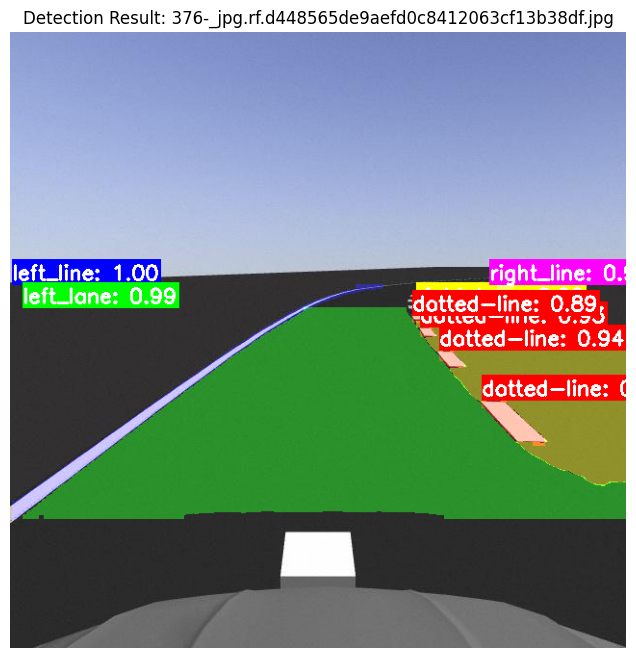

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


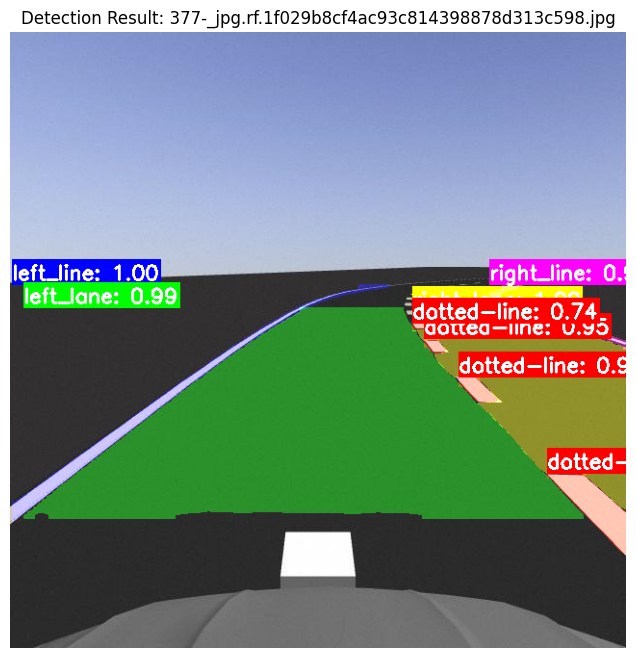

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


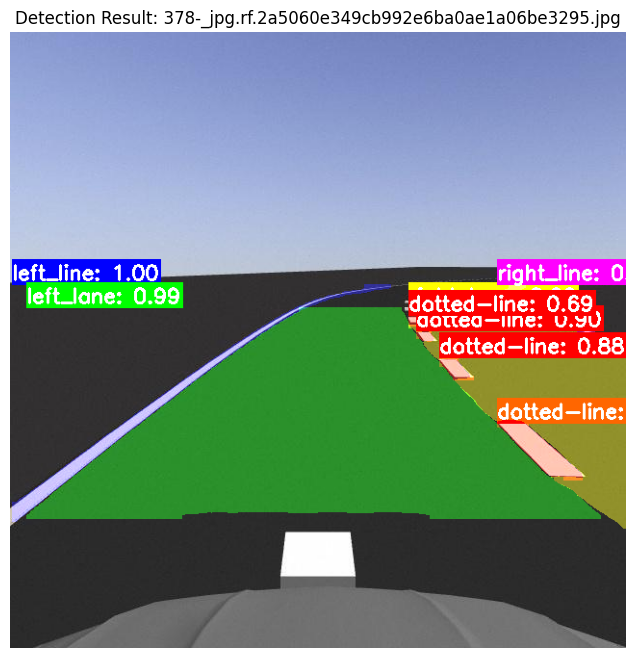

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


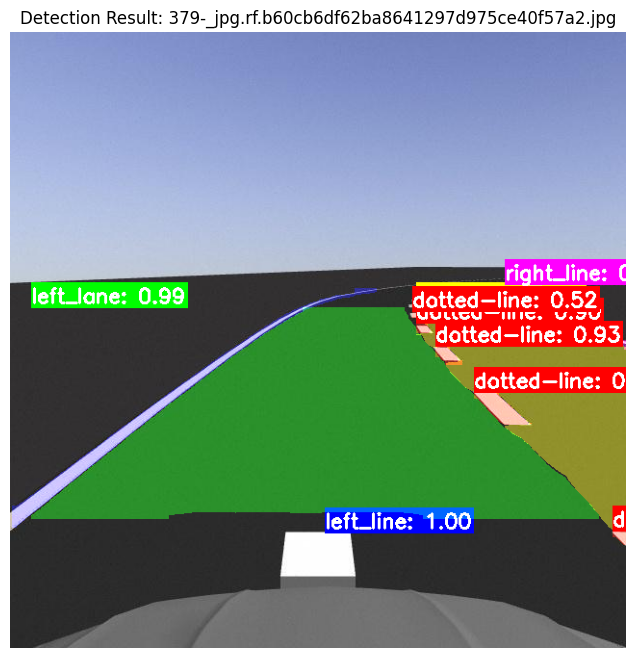

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


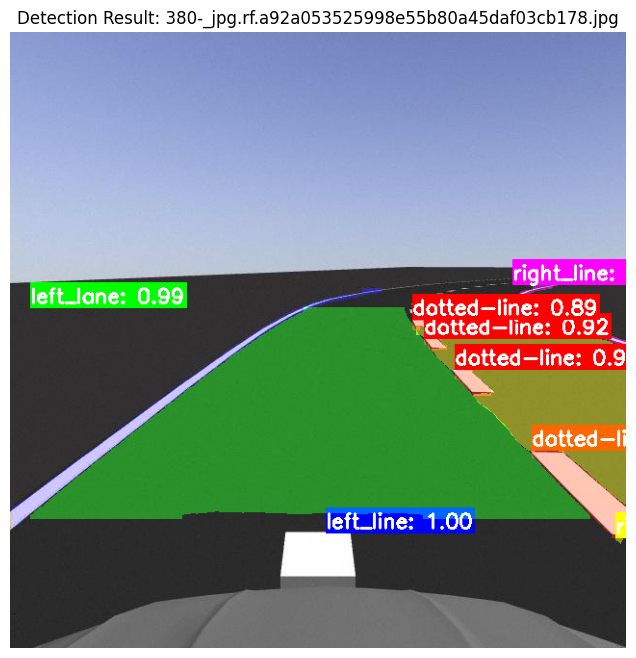

In [17]:
import matplotlib.pyplot as plt
import numpy as np

image_dir = '/content/dataset/test/images/'
test_images = sorted([img for img in os.listdir(image_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])


for i, img_name in enumerate(test_images[:5]):  # 처음 5개만
    img_path = f'/content/dataset/test/images/{img_name}'

    # 예측 실행
    result = model.predict(img_path, conf=0.5, verbose=False)

    # 향상된 시각화
    enhanced_img = draw_enhanced_results(img_path, result)

    # 결과 표시
    plt.figure(figsize=(12, 8))
    plt.imshow(enhanced_img)
    plt.title(f'Detection Result: {img_name}')
    plt.axis('off')
    plt.show()


In [18]:
import shutil
from google.colab import files

# 1. zip 파일로 압축 (기존 zip 파일이 있다면 덮어씌움)
shutil.make_archive('/content/runs_backup', 'zip', '/content/runs')

# 2. 다운로드 링크 제공
files.download('/content/runs_backup.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
#동영상으로 만들기

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# YOLO 예측 + 시각화 함수 (콜라보용)
image_dir = '/content/dataset/test/images/'
test_images = sorted([img for img in os.listdir(image_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])

frames = []

for i, img_name in enumerate(test_images[:15]):  # 처음 5개만
    img_path = os.path.join(image_dir, img_name)

    # 예측 실행
    result = model.predict(img_path, conf=0.5, verbose=False)

    # 향상된 시각화
    enhanced_img = draw_enhanced_results(img_path, result)

    # RGB -> BGR (OpenCV용)
    bgr_img = cv2.cvtColor(np.array(enhanced_img), cv2.COLOR_RGB2BGR)

    # 모든 프레임 사이즈를 동일하게 유지
    bgr_img = cv2.resize(bgr_img, (1280, 720))

    frames.append(bgr_img)

# 🔄 동영상 생성
video_path = "/content/detection_results.mp4"
fps = 2  # 0.5초 간격 = 2프레임/초
height, width, _ = frames[0].shape
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 코덱 설정

out = cv2.VideoWriter(video_path, fourcc, fps, (width, height))

for frame in frames:
    out.write(frame)

out.release()
print(f"✅ 영상 저장 완료: {video_path}")

# Colab에서 다운로드 링크 제공
from google.colab import files
files.download(video_path)


Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
R

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>